# Tek Değişkenli Aykırı Gözlem Analizi

In [1]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds') 
df = diamonds.copy()
df = df.select_dtypes(include = ['float64', 'int64']) 
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table=df['table'].copy()

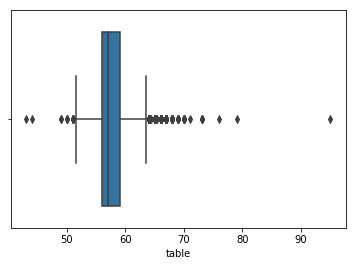

In [3]:
sns.boxplot(x=df_table);

In [4]:
Q1=df_table.quantile(0.25)
Q3=df_table.quantile(0.75)
IQR=Q3-Q1

alt_sınır=Q1-1.5*IQR
ust_sınır=Q3+1.5*IQR

In [5]:
alt_sınır

51.5

In [6]:
ust_sınır

63.5

In [7]:
(df_table<(alt_sınır))|(df_table>(ust_sınır))

0        False
1        False
2         True
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
53910    False
53911    False
53912    False
53913    False
53914    False
53915    False
53916    False
53917    False
53918    False
53919    False
53920    False
53921    False
53922    False
53923    False
53924    False
53925    False
53926    False
53927    False
53928    False
53929    False
53930    False
53931    False
53932    False
53933    False
53934    False
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [8]:
df_table<(alt_sınır)

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
53910    False
53911    False
53912    False
53913    False
53914    False
53915    False
53916    False
53917    False
53918    False
53919    False
53920    False
53921    False
53922    False
53923    False
53924    False
53925    False
53926    False
53927    False
53928    False
53929    False
53930    False
53931    False
53932    False
53933    False
53934    False
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [9]:
aykırı_tf=df_table<(alt_sınır)

In [10]:
aykırılar=df_table[aykırı_tf]
aykırılar

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [11]:
import pandas as pd

In [12]:
df_table.head()
type(df_table)

pandas.core.series.Series

In [13]:
df_table=pd.DataFrame(df_table)
df_table.shape

(53940, 1)

In [14]:
temiz_df_table=df_table[~(((df_table<alt_sınır)|(df_table>ust_sınır))).any(axis=1)]
temiz_df_table.shape

(53335, 1)

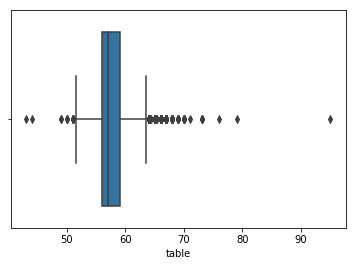

In [15]:
df_table=df['table'].copy()
sns.boxplot(x=df_table);

In [16]:
df_table[aykırı_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [17]:
df_table.mean()

57.45718390804603

# Aykırı gözlemlere ortalama atama

In [18]:
aykırı_tf=((df_table<alt_sınır)|(df_table>ust_sınır))

In [19]:
df_table[aykırı_tf].head()

2      65.0
91     69.0
145    64.0
219    64.0
227    67.0
Name: table, dtype: float64

In [20]:
df_table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [21]:
df_table[aykırı_tf]=df_table.mean()

In [22]:
df_table.describe()

count    53940.000000
mean        57.374344
std          2.062702
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

# Baskılama Yöntemi

In [23]:
df_table=df['table'].copy()
aykırı_alt_sınır=df_table<alt_sınır
aykırı_ust_sınır=df_table>ust_sınır

In [24]:
df_table[aykırı_alt_sınır]=alt_sınır
df_table[aykırı_ust_sınır]=ust_sınır

In [25]:
df_table.describe()

count    53940.000000
mean        57.438561
std          2.161139
min         51.500000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

In [26]:
df['table'].describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

# Çok Değişkenli Aykırı Gözlem Analizi

## Local Outlier Factor

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)
X_inliers = np.random.normal(70, 3, (100, 2))

X_inliers = np.r_[X_inliers + 10, X_inliers - 10] 

print(X_inliers.shape)
print(X_inliers[:3,:2])

(200, 2)
[[81.49014246 79.5852071 ]
 [81.94306561 84.56908957]
 [79.29753988 79.29758913]]


In [28]:
X_outliers = np.random.uniform(low=15, high=130, size=(20, 2))

In [29]:
X_outliers

array([[115.89790327, 100.18839104],
       [ 95.15681021,  95.78566966],
       [ 56.34148239,  48.76306209],
       [108.07653288, 108.16304039],
       [114.71331664, 120.02266354],
       [ 73.80437587,  72.67437389],
       [106.80394558,  89.74585204],
       [ 95.72619088, 106.51615699],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 68.54377209,  77.40413299],
       [ 47.95224399,  82.94582497],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263],
       [ 77.17303899,  88.30443867]])

In [30]:
X = np.r_[X_inliers, X_outliers]

In [31]:
X[0:3,:]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [32]:
LOF = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [33]:
LOF.fit_predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [34]:
X_score=LOF.negative_outlier_factor_

In [35]:
X_score

array([ -0.99920793,  -1.14732911,  -0.97212675,  -1.32719465,
        -0.96975281,  -0.96802782,  -1.1805622 ,  -1.19797585,
        -1.01561029,  -1.15267042,  -1.21993084,  -1.05831363,
        -0.97110275,  -1.02663395,  -0.96154064,  -1.32250926,
        -1.01699286,  -1.10234974,  -1.19346895,  -1.05776726,
        -1.04856181,  -0.96442079,  -1.15375777,  -1.04363184,
        -1.13388154,  -0.97715087,  -0.98044628,  -1.13725117,
        -0.98956357,  -1.02785428,  -0.95728791,  -1.16047442,
        -1.13796262,  -0.99593571,  -0.99185635,  -1.13931637,
        -1.14278418,  -1.91696252,  -0.95681998,  -1.19901531,
        -0.94185764,  -1.25760245,  -1.01278495,  -1.11585158,
        -0.98451094,  -0.99655791,  -0.97848957,  -1.1047896 ,
        -0.99211614,  -0.96275604,  -1.09599368,  -0.97642952,
        -0.9472918 ,  -1.43796858,  -0.963528  ,  -1.28400084,
        -1.46986045,  -0.94456349,  -1.04606649,  -1.16724676,
        -1.0681155 ,  -1.29733998,  -1.33698889,  -1.06

In [36]:
X_score.mean()

-1.6850227435158005

In [37]:
X_score.std()

2.140119050235338

In [38]:
np.sort(X_score)[0:10]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573,  -8.51275904])

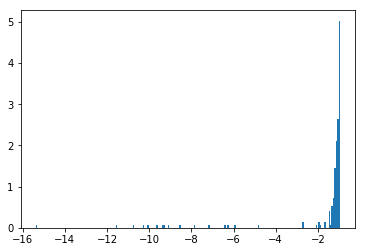

In [39]:
plt.hist(X_score,bins='auto',density=True);

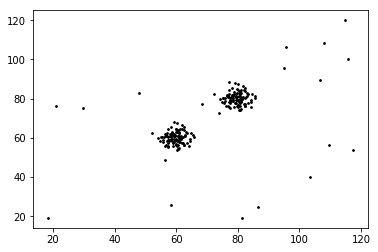

In [40]:
plt.scatter(X[:,0], X[:,1], color = "k", s = 3, label = "Gözlem Birimleri");

In [41]:
radius = radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())

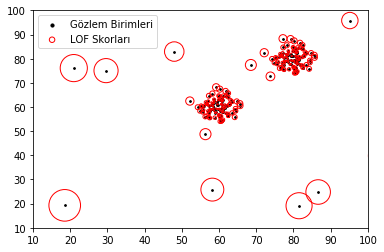

In [42]:
plt.scatter(X[:,0], X[:,1], color = "k", s = 3, label = "Gözlem Birimleri");

plt.scatter(X[:, 0], X[:, 1], s = 1000 * radius, edgecolors='r', 
            facecolors='none',label='LOF Skorları')

plt.xlim((10,100))
plt.ylim((10,100))

legend = plt.legend(loc = "upper left")

legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [30]

In [43]:
X[0:3]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [44]:
np.sort(X_score)[0:9]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573])

In [45]:
esik_deger=np.sort(X_score)[9]
esik_deger

-8.512759037993277

In [46]:
tf_vector=(X_score>esik_deger)

In [47]:
arındırılmıs=X[tf_vector]
arındırılmıs[0:9]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913],
       [84.73763845, 82.30230419],
       [78.59157684, 81.62768013],
       [78.60974692, 78.60281074],
       [80.72588681, 74.26015927],
       [74.8252465 , 78.31313741],
       [76.96150664, 80.942742  ]])

In [48]:
X[~tf_vector] #aykırı gözlem

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [49]:
X[X_score<esik_deger]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

# Aykırı Gözlem Problemini Çözmek

In [50]:
df=X[X_score>esik_deger]
df[0:9]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913],
       [84.73763845, 82.30230419],
       [78.59157684, 81.62768013],
       [78.60974692, 78.60281074],
       [80.72588681, 74.26015927],
       [74.8252465 , 78.31313741],
       [76.96150664, 80.942742  ]])

In [51]:
df_x=X.copy()

In [52]:
np.mean(df_x[0])

80.53767477776006

In [53]:
np.mean(df_x[1])

83.25607759176307

In [54]:
aykırılar=df_x[~tf_vector]
aykırılar

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [55]:
aykırılar[:,:1]

array([[114.71331664],
       [117.35061431],
       [ 58.19203955],
       [ 81.50221621],
       [ 18.50752874],
       [109.59906448],
       [ 29.61195895],
       [103.54925861],
       [ 86.63240472],
       [ 20.94339793]])

In [56]:
aykırılar[:,:1]=np.mean(df_x[0])

In [57]:
aykırılar[:,1:2]=np.mean(df_x[1])

In [58]:
aykırılar

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

In [59]:
df_x[~tf_vector]=aykırılar
df_x[~tf_vector]

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

In [60]:
#baskılama işlemi
df_x=X.copy()

In [61]:
df_x[~tf_vector]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [62]:
df_x[X_score==esik_deger]

array([[58.19203955, 25.80792308]])

In [63]:
df_x[~tf_vector]=df_x[X_score==esik_deger]

In [64]:
df_x[~tf_vector]

array([[58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308]])

In [65]:
# Eksik Veri
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [66]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [67]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [68]:
dff=df.dropna()
dff.isnull().sum()

V1    0
V2    0
V3    0
dtype: int64

In [69]:
#Basit değer atama
df['V1'].mean()

6.0

In [70]:
df['V1'].fillna(df['V1'].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [71]:
df['V1'].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [72]:
df.apply(lambda x: x.fillna(x.mean()), axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [73]:
#Eksik gözlem saptamak
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [74]:
df.shape

(9, 3)

In [75]:
df.describe()

,V1,V2,V3
count,7.0,6.000000,7.00000
mean,6.0,6.166667,11.00000
std,5.0,3.656045,9.72968
min,1.0,2.000000,2.00000
25%,2.0,3.500000,5.50000
50%,6.0,6.000000,7.00000
75%,8.0,7.750000,13.00000
max,15.0,12.000000,31.00000


In [76]:
df.dtypes

V1    float64
V2    float64
V3    float64
dtype: object

In [77]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [78]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [79]:
df.isnull().sum().sum()

7

In [80]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [81]:
df[df.isnull().any(axis=1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [82]:
df[df.notnull().all(axis=1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [83]:
df[df['V1'].notnull()&df['V3'].notnull()&df['V2'].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [84]:
# Eksik Veri Görselleştirme

In [85]:
!pip install missingno

In [86]:
import missingno as msno

In [87]:
df.head()

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0


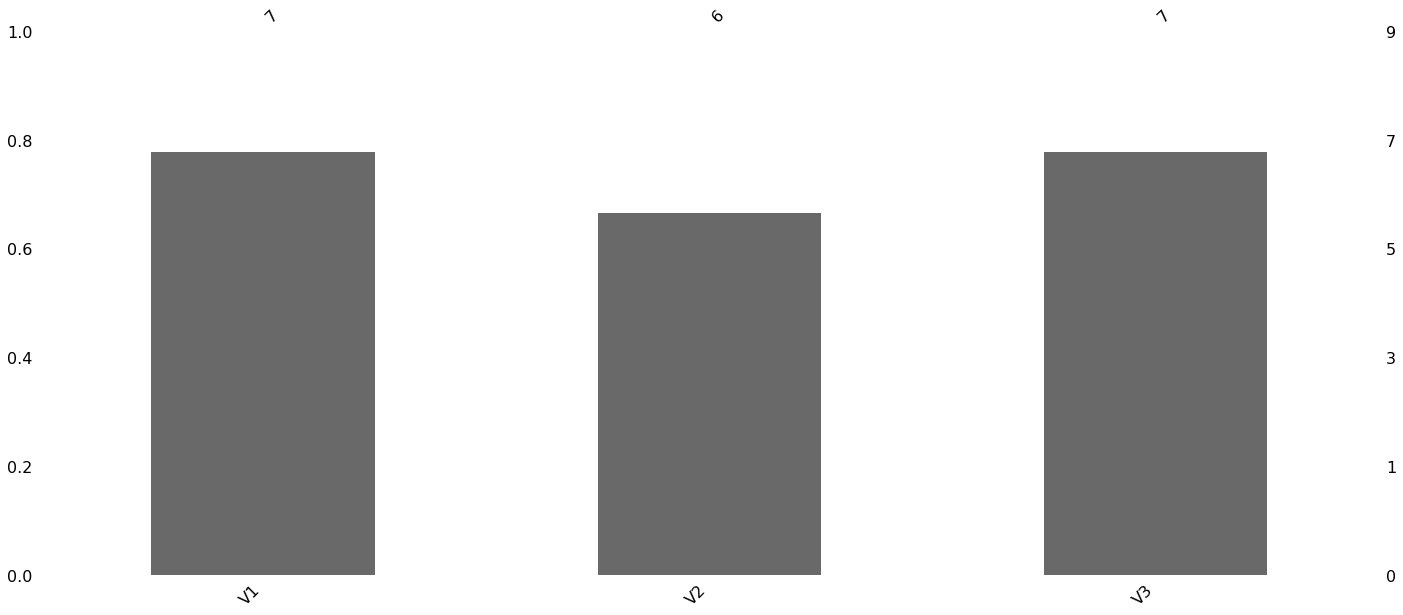

In [88]:
msno.bar(df);

In [89]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

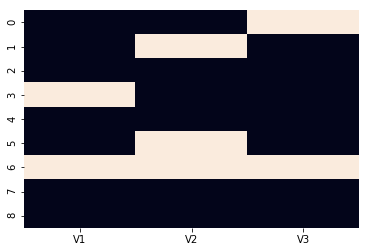

In [90]:
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False);

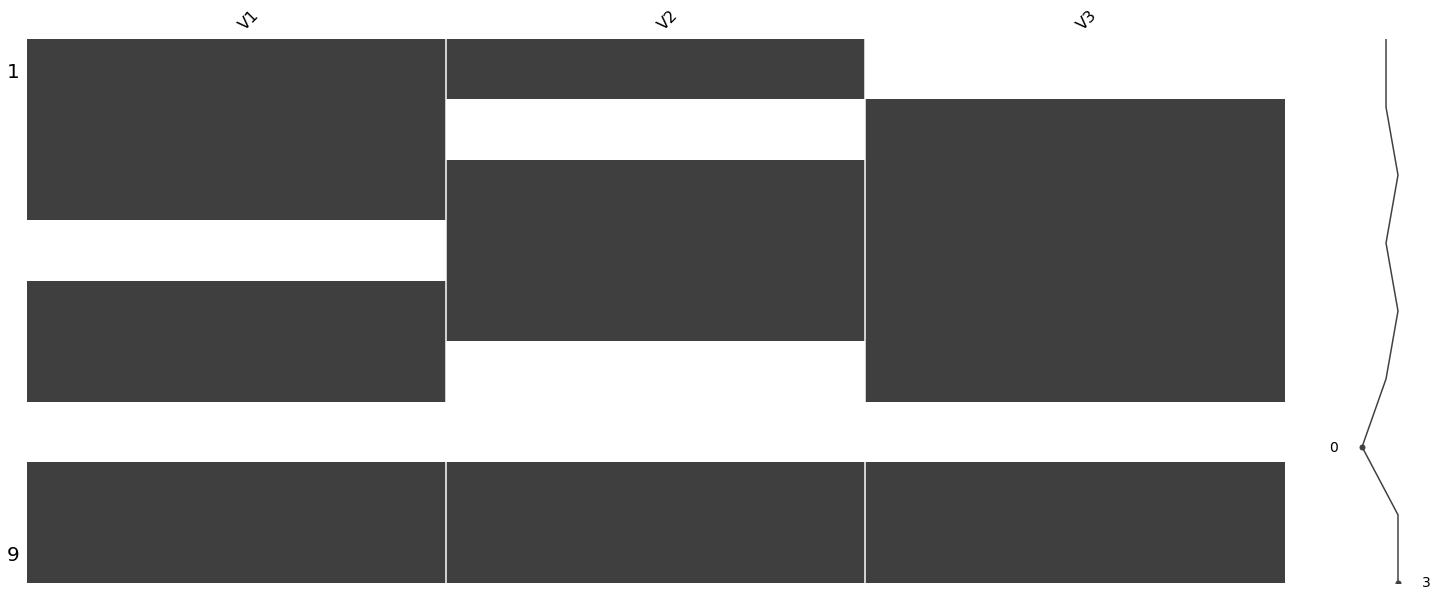

In [91]:
msno.matrix(df)

In [92]:
df=sns.load_dataset('planets').copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


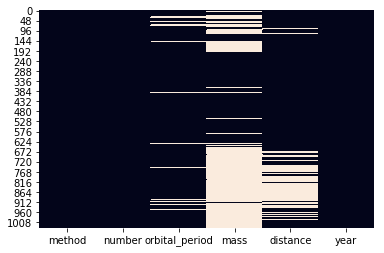

In [93]:
sns.heatmap(df.isnull(),cbar=False);

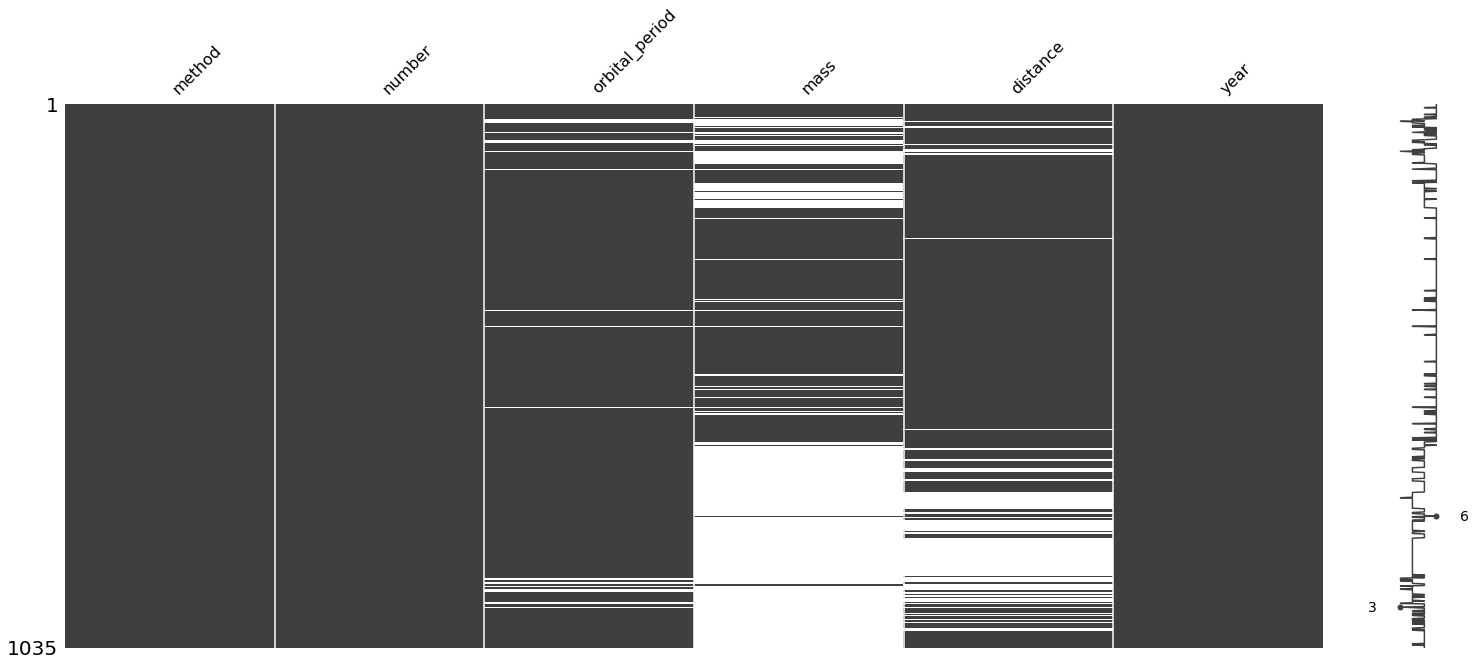

In [94]:
msno.matrix(df);

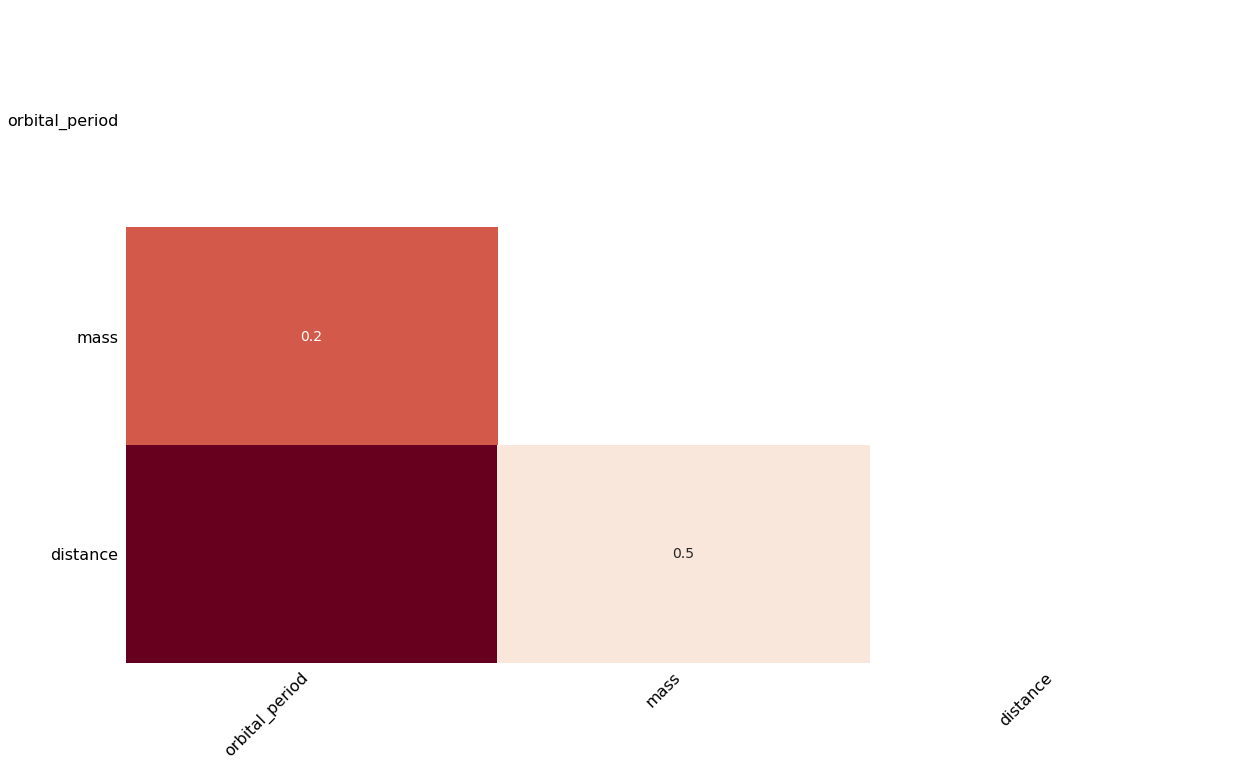

In [95]:
msno.heatmap(df);

In [96]:
#Eksikliğin 
#1-mass ile distance arasında 0.5 + yönlü ilişki vardır
#2-mass ile orbital_period arasında 0.2+ yönlü ilişki vardır

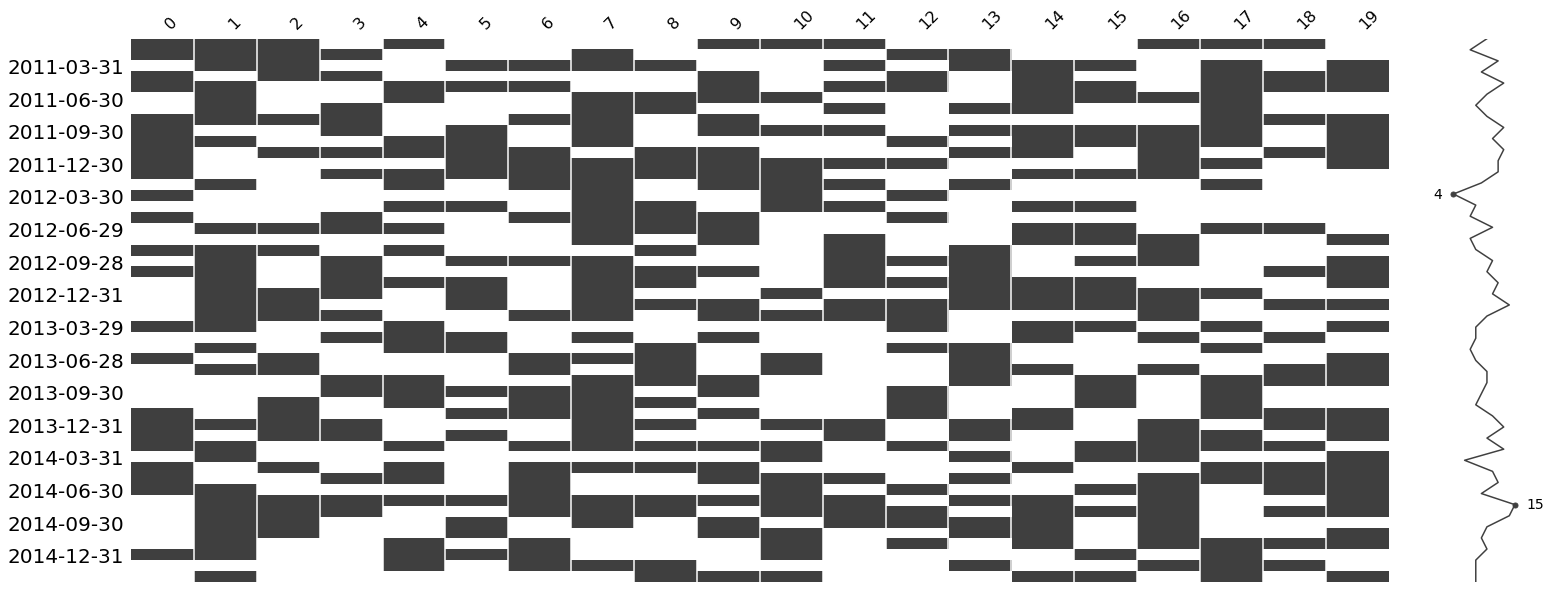

In [97]:
null_pattern = (np.random.random(1000).reshape((50, 20)) > 0.5).astype(bool)

null_pattern = pd.DataFrame(null_pattern).replace({False: None})

msno.matrix(null_pattern.set_index(pd.period_range('1/1/2011', '2/1/2015', freq='M')) , freq='BQ');

In [98]:
# Eksik veri silme yaklaşımları

In [99]:
#Eksik gözlem saptamak
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [100]:
df.dropna()# en az bir değişkeni na olan gözlemin silinmesi

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [101]:
df.dropna(how='all') # tüm değişkenleri na olan gözlemin silinmesi

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [102]:
df.dropna(axis=1) # her hangi bir eksik gözlemi olan değişkeni siler

""
0
1
2
3
4
5
6
7
8


In [103]:
df['silbeni']=np.nan

In [104]:
df.dropna(axis=1,how='all',inplace=True)
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [105]:
# Basit değer atama
df['V1'].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [106]:
df['V1'].fillna(df['V1'].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [107]:
df.apply(lambda x: x.fillna(x.mean()),axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [108]:
df.fillna(df.mean()[:])

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [109]:
df.fillna(df.mean()['V1':'V2'])

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [110]:
df.where(pd.notna(df),df.mean(),axis='columns')

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [111]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [112]:
df.groupby('departman')['maas'].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [113]:
df['maas'].fillna(df.groupby('departman')['maas'].mean())

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: maas, dtype: float64

# Kategorik Değişkenlerde Değer atama

In [114]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT",np.NaN,"IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,nan
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [115]:
df.isnull()

,maas,V2,V3,departman
0,False,False,True,False
1,False,True,False,False
2,False,False,False,False
3,True,False,False,False
4,False,False,False,False
5,False,True,False,False
6,True,True,True,False
7,False,False,False,False
8,False,False,False,False


In [116]:
df.groupby('departman')['departman'].count()

departman
IK     5
IT     3
nan    1
Name: departman, dtype: int64

In [117]:
df.departman.loc[df.departman=='nan']='IK'

C:\Users\asus1\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [118]:
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IK
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [119]:
df.departman[0]=df.V3[0]

C:\Users\asus1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [120]:
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,IK
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [121]:
df.groupby('departman')['departman'].count()

departman
IK    6
IT    2
Name: departman, dtype: int64

In [122]:
df.departman.fillna(df['departman'].mode())

0    IK
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

# Zaman serilerinde atama işlemleri

In [123]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [124]:
df['maas'].interpolate()

0     1.0
1     3.0
2     6.0
3     6.5
4     7.0
5     1.0
6     5.0
7     9.0
8    15.0
Name: maas, dtype: float64

In [125]:
df['maas'].fillna(method='bfill')

0     1.0
1     3.0
2     6.0
3     7.0
4     7.0
5     1.0
6     9.0
7     9.0
8    15.0
Name: maas, dtype: float64

# Tahmine dayalı atama

number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


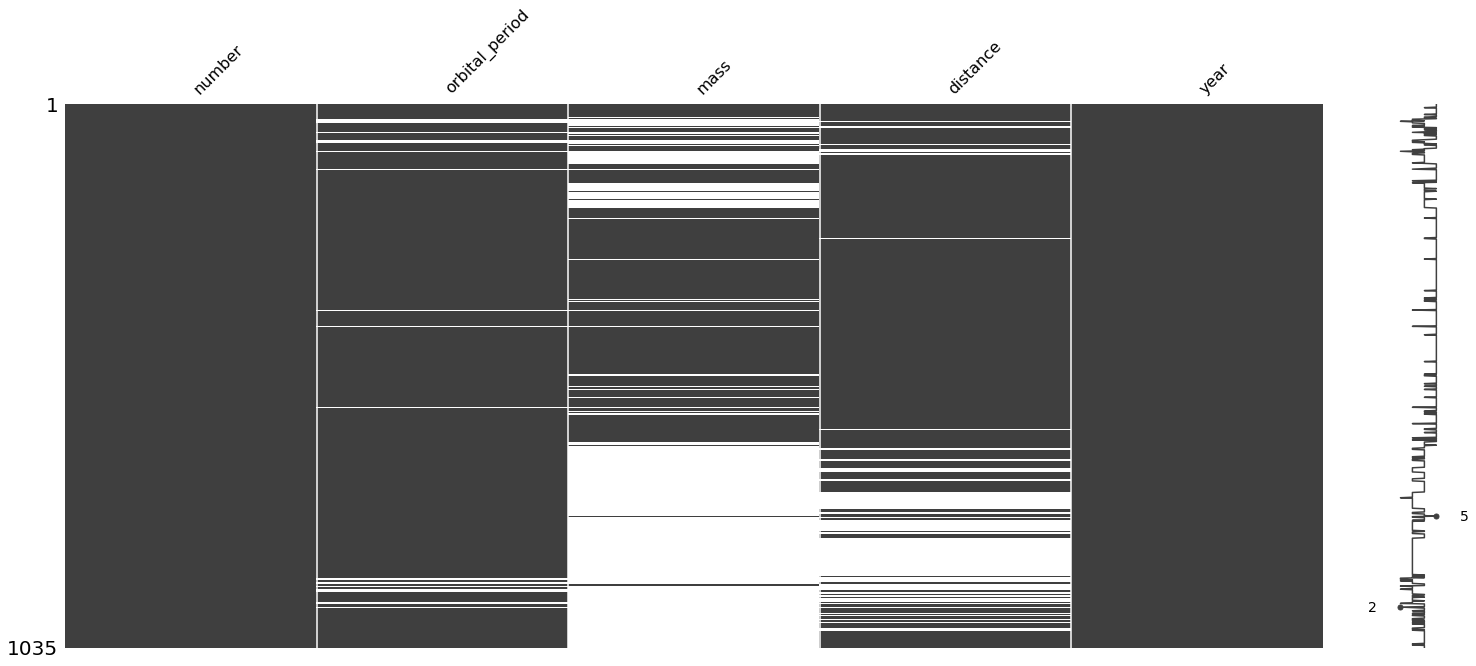

In [126]:
import seaborn as sns
df = sns.load_dataset('planets').copy()
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.isnull().sum())
msno.matrix(df);

In [183]:
!pip install fancyimpute

  Found existing installation: wrapt 1.10.11


Cannot uninstall 'wrapt'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [188]:
from fancyimpute import KNN

ModuleNotFoundError: No module named 'fancyimpute'

In [171]:
var_names=list(df)

In [174]:
# KNN


ModuleNotFoundError: No module named 'fancyimpute'

In [172]:
knn_impute=KNN(K=5).fit_transform(df);

NameError: name 'KNN' is not defined

In [ ]:
dff=pd.DataFrame(knn_impute)

In [ ]:
dff.head()

In [ ]:
dff.columns=var_names

In [ ]:
dff.isnull().sum

In [137]:
!pip install ycimpute

In [148]:
from ycimpute.imputer import knnimput

ImportError: cannot import name 'MultiOutputMixin' from 'sklearn.base' (C:\Users\asus1\Anaconda3\lib\site-packages\sklearn\base.py)

In [140]:
n_df=np.array(df)

In [141]:
n_df.shape

(1035, 5)

In [142]:
dff=knniput.KNN(k=4).complete(n_df)

NameError: name 'knniput' is not defined

In [143]:
dff.head()


,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [144]:
dff.isnull().sum()

V1    0
V2    0
V3    0
dtype: int64

# Random Forest ile atama

number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


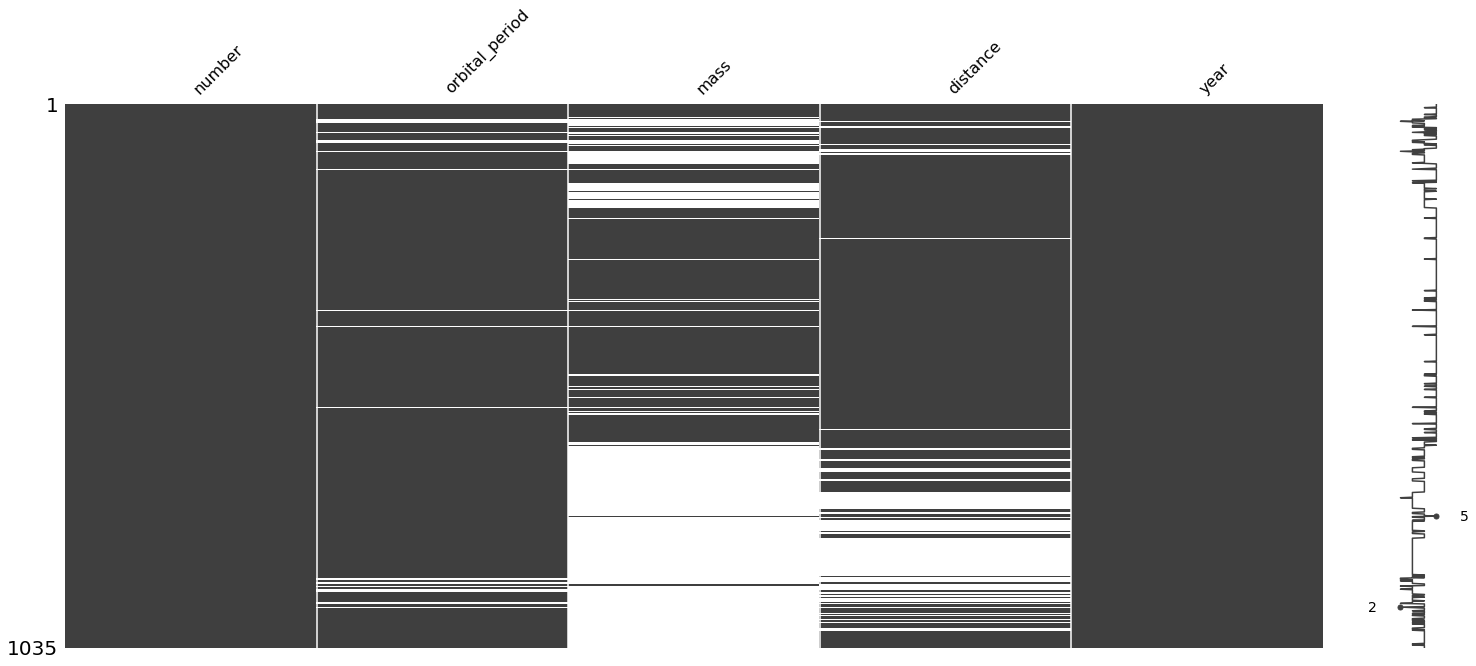

In [146]:
import seaborn as sns
df = sns.load_dataset('planets').copy()
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.isnull().sum())
msno.matrix(df);

In [155]:
from ycimpute.imputer import iterforest

ImportError: cannot import name 'MultiOutputMixin' from 'sklearn.base' (C:\Users\asus1\Anaconda3\lib\site-packages\sklearn\base.py)

In [156]:
var_names=list(df)

In [157]:
n_df=np.array(df)

In [158]:
dff=iterforest.IterImput().complete(n_df)

NameError: name 'iterforest' is not defined

# EM ile atama

In [160]:
df.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [165]:
from ycimpute.imputer import EM
var_names=list(df)
n_df=np.array(df)

ImportError: cannot import name 'MultiOutputMixin' from 'sklearn.base' (C:\Users\asus1\Anaconda3\lib\site-packages\sklearn\base.py)

In [162]:
dff=EM().complete(n_df)
dff=pd.DataFrame(dff,columns=var_names)

NameError: name 'EM' is not defined

# Veri Standardizasyonu

In [190]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)



df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [191]:
from sklearn import preprocessing

In [193]:
preprocessing.scale(df) #Standartlaştırma işlemi

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [194]:
# Normalizasyon 
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

In [196]:
# min max dönüşümü 
scaler=preprocessing.MinMaxScaler(feature_range=(10,20))
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

In [198]:
# Binarize Dönüşüm
binarizer=preprocessing.Binarizer(threshold=5).fit(df)
binarizer.transform(df)

array([[0., 1., 1.],
       [0., 1., 1.],
       [1., 0., 0.],
       [0., 1., 1.],
       [1., 1., 1.]])

In [199]:
# 0-1 dönüşümü
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df_l = df.copy()

In [200]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [201]:
df_l['yeni_cinsiyet']=df_l['sex'].cat.codes

In [203]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_cinsiyet
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [205]:
lbl=preprocessing.LabelEncoder()
df_l['daha_yeni']=lbl.fit_transform(df_l['sex'])
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_cinsiyet,daha_yeni
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


In [207]:
# 1 ve diğerleri (0) dönüşümü
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_cinsiyet,daha_yeni
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


In [208]:
df_l['yeni_gun']=np.where(df_l['day'].str.contains('Sun'),1,0)

In [210]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_cinsiyet,daha_yeni,yeni_gun
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1


In [215]:
# Çok sınıflı Dönüşüm
lbe=preprocessing.LabelEncoder()
df_l['daha_yeni_gun']=lbe.fit_transform(df_l['day'])
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_cinsiyet,daha_yeni,yeni_gun,daha_yeni_gun
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1,2


In [217]:
# One hot dönüşümü ve Dummy Değişken tuzağı
df_one_hot=df.copy()
pd.get_dummies(df_one_hot,columns=['sex'],prefix=['sex']).head()

,total_bill,tip,smoker,day,time,size,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1


In [218]:
pd.get_dummies(df_one_hot,columns=['day'],prefix=['day']).head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,0,0,1


In [219]:
#Sürekli değişkeni Kategorik değişkene çevirme
df.head()

KBinsDiscretizer(encode='onehot', n_bins=5, strategy='quantile')

In [220]:
dff = df.select_dtypes(include = ["float64", "int64"])
est = preprocessing.KBinsDiscretizer(n_bins = [3,2,2], encode = "ordinal", strategy = "quantile").fit(dff)

In [222]:
est.transform(dff)[0:10]

array([[1., 0., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.]])

In [223]:
# Değişkeni indexe indexi değişkene çevirme
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [227]:
df["yeni_degisken"]  = df.index

In [228]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_degisken
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,2
3,23.68,3.31,Male,No,Sun,Dinner,2,3
4,24.59,3.61,Female,No,Sun,Dinner,4,4


In [229]:
df["yeni_degisken"] = df["yeni_degisken"] + 10

In [230]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_degisken
0,16.99,1.01,Female,No,Sun,Dinner,2,10
1,10.34,1.66,Male,No,Sun,Dinner,3,11
2,21.01,3.50,Male,No,Sun,Dinner,3,12
3,23.68,3.31,Male,No,Sun,Dinner,2,13
4,24.59,3.61,Female,No,Sun,Dinner,4,14


In [232]:
df.index=df['yeni_degisken']

In [233]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_degisken
yeni_degisken,,,,,,,,
10,16.99,1.01,Female,No,Sun,Dinner,2,10
11,10.34,1.66,Male,No,Sun,Dinner,3,11
12,21.01,3.50,Male,No,Sun,Dinner,3,12
13,23.68,3.31,Male,No,Sun,Dinner,2,13
14,24.59,3.61,Female,No,Sun,Dinner,4,14
